In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets as d

# Load the wine dataset
wine_data = d.load_wine()

# Get the feature names
feature_names = wine_data.feature_names

# Get the target names
target_names = wine_data.target_names

# Get the features and target
features = wine_data.data
target = wine_data.target

# Print some information about the dataset
print("Feature names:", feature_names)
print("Target names:", target_names)
print("Number of samples:", len(features))
print("Number of features:", len(feature_names))
print("Number of classes:", len(target_names))


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']
Number of samples: 178
Number of features: 13
Number of classes: 3


In [3]:
wine = d.load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
x = df.drop('target',axis='columns')
y = df.target

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 50) 

In [8]:
print("input - training set :", x_train.shape)
print("output - training set :", y_train.shape)
print("input - validation set :", x_test.shape)
print("output - validation set :", y_test.shape)

input - training set : (142, 13)
output - training set : (142,)
input - validation set : (36, 13)
output - validation set : (36,)


In [9]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(x_train,y_train)

MultinomialNB()

In [10]:
model1.score(x_test, y_test)

0.8611111111111112

In [11]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(x_train,y_train)

GaussianNB()

In [12]:
model2.score(x_test, y_test)

0.9722222222222222

In [13]:
model2.predict(x_test)

array([1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1,
       0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1])

In [14]:
model1.predict(x_test)

array([1, 1, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1,
       0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1])

# Confusion Matrix MultinomialNB

In [15]:
y_predicted = model1.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

Text(95.72222222222221, 0.5, 'Truth')

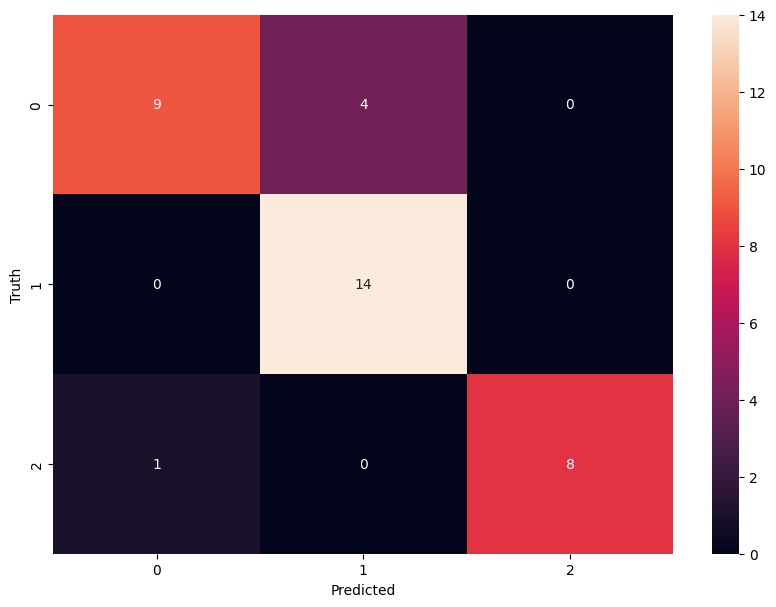

In [16]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Confusion Matrix for GaussianNB

In [17]:
y_predicted = model1.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

Text(95.72222222222221, 0.5, 'Truth')

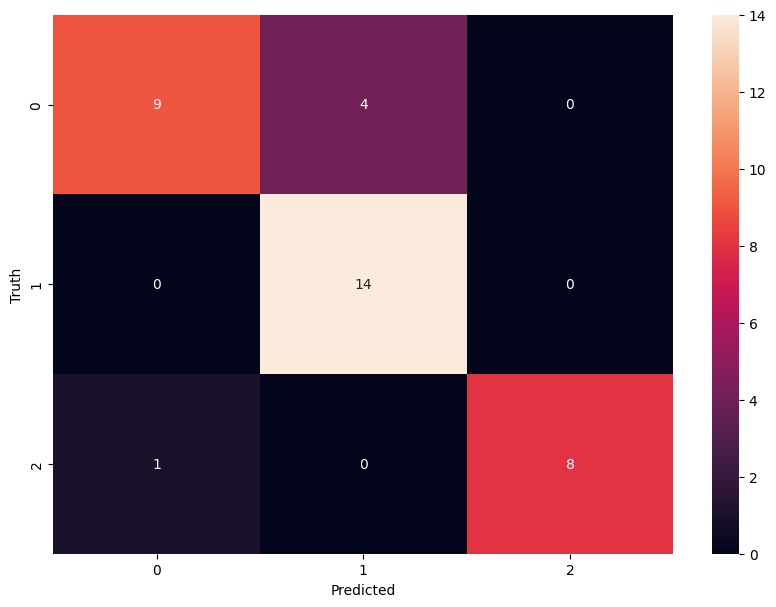

In [18]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')